### The goal of this notebook is to compare the different classes of mOSN markers. Presumably the markers that are activated at later stage of the cell lineage may be regulated or participating in different pathways in comparison to late activated genes. 

In [1]:
import pandas as pd 
import numpy as np 
import plotly.graph_objects as go 
import plotly.express as px

from importlib import reload
from utils import GE_functions
reload(GE_functions)

<module 'utils.GE_functions' from '/data/jlu/Chaperone_Analysis/notebooks/utils/GE_functions.py'>

In [2]:
mOSN_rankgenegroup = pd.read_csv('../output/brann/mOSN_rankgenegroup.csv', index_col=0)
mOSN_rankgenegroup.sort_values(['mOSN_scores','mOSN_logfoldchanges'], 
                               ascending=False, inplace=True)

In [3]:
ge_normalized = pd.read_csv('../expression_csv/ge_normalized_normExp_GSE151346_MOE_ALL_OlfrSum.csv', 
                            index_col=0)

### Give genes a variable value for the onset time. Using area under the curve (AUC) as metric. Presumably the later the onset the lower AUC will be across OSN lineage. 

deprecated: Define genes that are late onest as genes lower normalized activation than Omp at 0.8-0.95 bins. <br>(Omp considered late)

In [4]:
top_mOSNmarker = mOSN_rankgenegroup.loc[0:100].mOSN_names.to_list()
# filter for 'mt-' genes that are not in our ge_normalized data 
top_mOSNmarker = [i for i in top_mOSNmarker if 'mt-' not in i]
# top_mOSNmarker.insert(0,'index')

In [7]:
# Create colormap based on onset time (using AUC as proxy)
color_map = GE_functions.continuous_colors(ge_normalized[top_mOSNmarker].sum().sort_values().index, colormap = 'RdBu_r')

fig = go.Figure()

ge_data = GE_functions.get_ge_data(ge_normalized, top_mOSNmarker)
for g in ge_data['gene'].unique():
    plot_data = ge_data[ge_data['gene'] == g]    
    fig.add_trace(go.Scatter(x= plot_data['index'], 
                             y= plot_data['expression'],
                             opacity = 0.5,
                             mode ='lines', 
                             line_shape='spline',
                             name = g,
                             line=dict(
                                color = color_map[g],
                                width=8
#                                 dash = 'dot'
                            )
                        ))

# Add bolded lines for specific genes 
ge_data = GE_functions.get_ge_data(ge_normalized, ['Rtp1', 'Omp', 'Olfr_sum'])
for g in ge_data['gene'].unique():
    plot_data = ge_data[ge_data['gene'] == g]
    fig.add_trace(go.Scatter(x= plot_data['index'], 
                             y= plot_data['expression'],
                             mode = 'lines',
                             line_shape='spline',
                             name = g, 
                             line=dict(
                                color='black',
                                 dash='dot',
                                width=8)
    ))
    
fig.update_layout(xaxis_type = 'category',template='simple_white', # update x-axis to category so that it doesn't sort the numbers
                 title='mOSN markers colored by expression onset time<br>\
    <span style="font-size: 10px;">Data from Brann et al. scRNAseq WOM</span>',
                 font=dict(
        size=20,
    ))
fig.show()

# fig.write_html("../output/mOSNmarker_analysis/ge_line_mOSNmarker_labeled-Rdbu2.html")
# fig.write_html("../output/fig_image/mOSN_analysis/ge_line_mOSNmarker_labeled-Rdbu2.html")

ge_data constructed
ge_data constructed


In [18]:
from plotly.subplots import make_subplots

# Plot for supplemental figure. To visualize individual genes against Rtp1

# Create colormap based on onset time (using AUC as proxy)
genes_to_plot = ['Rtp1', 'Rtp2', 'Gfy', 'Clgn', 'Syt1', 'Syt4', 'Syt5', 'Syt7', 'Syt9', 'Syt11', 'Syt14', 'Syt16', 'Sytl1', 'Sytl2']
highlight_gene = 'Rtp1'
color_map = GE_functions.distinct_colors(ge_normalized[genes_to_plot].sum().sort_values().index)

# Get the number of rows and columns for the subplot grid
num_genes = len(genes_to_plot)
cols = 7
rows = (num_genes // cols) + (1 if num_genes % cols != 0 else 0)  # Adjust grid size

# Create subplots
fig = make_subplots(rows=rows, cols=cols, subplot_titles=genes_to_plot)

ge_data = GE_functions.get_ge_data(ge_normalized, genes_to_plot)

# Add traces for each gene
for idx, g in enumerate(genes_to_plot):
    plot_data = ge_data[ge_data['gene'] == g]
    row = (idx // cols) + 1
    col = (idx % cols) + 1
    fig.add_trace(
        go.Scatter(
            x=plot_data['index'],
            y=plot_data['expression'],
            opacity=0.5,
            mode='lines',
            line_shape='spline',
            name=g,
            line=dict(
                color=color_map[g],
                width=8
            )
        ),
        row=row,
        col=col
    )

    # Add bolded lines for specific genes (if needed, place in all subplots or a specific one)
    # Add the highlight gene trace
    for hg in ge_data_highlight['gene'].unique():
        highlight_data = ge_data_highlight[ge_data_highlight['gene'] == hg]
        fig.add_trace(
            go.Scatter(
                x=highlight_data['index'],
                y=highlight_data['expression'],
                mode='lines',
                line_shape='spline',
                name=hg,
                line=dict(
                    color='black',
                    dash='dot',
                    width=8
                )
            ),
            row=row,
            col=col
        )

# Update layout
fig.update_layout(
    xaxis_type='category',  # Ensure the x-axis remains categorical
    template='simple_white',
    # font=dict(size=20),
    showlegend=False  # Turn off legends to reduce clutter
)

# Remove x-axis labels for each subplot
for i in range(1, len(genes_to_plot) + 1):  # Iterate over all subplots
    fig.update_xaxes(showticklabels=False, row=(i - 1) // cols + 1, col=(i - 1) % cols + 1)

fig.show()

# fig.write_html("../output/fig_image/mOSN_analysis/ge_line_Rtp1_Syts.html")

ge_data constructed


### plot to visualize if there's a bias of abundance of expression and latency 

In [ ]:
"""
DEPRECATED: 
Usage of Early/Late marker is replaced with normalized expression AUC instead 
"""
# early_marker_df = mOSN_rankgenegroup[mOSN_rankgenegroup['mOSN_names'].isin(early_marker)][['mOSN_names','mOSN_logfoldchanges', 'mOSN_scores']]
# late_marker_df = mOSN_rankgenegroup[mOSN_rankgenegroup['mOSN_names'].isin(late_marker)][['mOSN_names','mOSN_logfoldchanges', 'mOSN_scores']]
# early_marker_df['expression'] = 'early'
# late_marker_df['expression'] = 'late'
# marker_df = pd.concat([early_marker_df, late_marker_df])

In [8]:
"""
Creates a marker_df with scores and logfoldchange information for the marker genes 
normalized_AUC information is also added from previously defined color_map 
"""
color_map = GE_functions.continuous_colors(ge_normalized[top_mOSNmarker].sum().sort_values().index, colormap = 'RdBu_r')

marker_df = mOSN_rankgenegroup[mOSN_rankgenegroup['mOSN_names'].isin(top_mOSNmarker)][['mOSN_names','mOSN_logfoldchanges', 'mOSN_scores']]
for gene in color_map: 
    marker_df.loc[marker_df['mOSN_names'] == gene, ['normalized_AUC', 'color']] = color_map[gene]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                     x = marker_df['normalized_AUC'], 
                     y = np.log(marker_df['mOSN_logfoldchanges']), 
                     mode = 'markers',
                     text = marker_df['mOSN_names'],
                     marker = dict(
                         size = 15,
                         color = marker_df['color']
#                          color = marker_df['mOSN_scores'],
#                          colorscale = 'Viridis',
#                          title = 'RankGeneGroup Score',
#                          showscale = True
                              ),
                     hovertemplate = "%{text} <br>LogFC: %{y} \
                                 </br>Score: %{marker.color}",
#                     showlegend=False
                    )
             )

# Calculate Pearson Correlation 
x = list(marker_df['normalized_AUC'])
y = list(np.log(marker_df['mOSN_logfoldchanges']))
r, r_p = pearsonr(x, y)

# Add a line for the correlation coefficient
fig.add_trace(go.Scatter(x=[min(x), max(x)], y=[r*min(y), r*max(y)],
                         mode='lines', 
                         line = dict(
                             dash='dot',
                             width = 5,
                             color = 'rgba(0, 0, 0, 0.5)'
                         ),
                         name='Pearson correlation: {} <br>Pearson p-value: {}'.format(round(r,3), 
                                                                                round(r_p, 5)),
#                          showlegend=False
                        )
             )



fig.update_layout(
        template='simple_white', # update x-axis to category so that it doesn't sort the numbers
        title="Genes with late expression are more enriched in mOSNs <br>\
    <span style='font-size: 10px;'> pearson r: " + str(np.round(r, 3)) + "</span>",
        yaxis = {'title' : 'Log( Enrichness )'},
        xaxis = {'showticklabels': True, 
#                  'title' :'<b>Early onset mOSN markers \
#                      Late onset mOSN markers</b>'},
                 'title' : 'Normalized gene expression AUC'},
        font=dict(
            size=15,
    )
)
fig.show()

# fig.write_html("../output/mOSNmarker_analysis/mOSNmarker_logfc_score-Rdbu.html")

#### Correlation plot 
Visualize any expressional consistency between early / late onset genes

In [ ]:
top_mOSNmarker = mOSN_rankgenegroup.loc[0:100].mOSN_names.to_list()
top_mOSNmarker = [i for i in top_mOSNmarker if 'mt-' not in i]

In [10]:
ge_normalized = pd.read_csv('../expression_csv/ge_normalized_normExp_GSE151346_MOE_ALL_OlfrSum.csv', index_col=0)

plot_df = ge_normalized[ge_normalized[top_mOSNmarker].sum().sort_values().index].corr()

fig = px.imshow(plot_df,
                color_continuous_scale='Viridis')

# add labels and colorbar
fig.update_layout(title='Correlation Heatmap',
                  coloraxis_colorbar=dict(title='Correlation'), 
                  plot_bgcolor='rgba(0,0,0,0)')

# display plot
fig.show()
# fig.write_html('../output/fig_image/mOSN_analysis/top_mOSNmarker_corr.html')

### Transcriptional Factor network analysis 

In [5]:
import matplotlib.pyplot as plt 
import networkx as nx

In [6]:
cloned_genes = [
    "Gfy", "Clgn", "Hspa12a", "Sult1d1", "Acsl6", "Cfap206", "Pde6d", "Aplp2", "Efcab10", "Slc24a2",
    "Klhl5", "Ttc21a", "Fam217a", "Herpud1", "Tmbim6", "Manea", "Rtbdn", "Rd3", "Ebf2", "Ebf4", "Lingo2",
    "Flrt1", "Umodl1", "Syt5", "Gpx6", "Jph4", "Efna3", "Clstn2", "Ccdc184", "Trarg1", "Brdt", "Cfap100",
    "Faim2", "Jakmip1", "Ephx4", "Serpine2", "Ddit3", "txn3", "Tenm2", "Tenm4", "Tenm1", "Syt1", "Syt4",
    "Syt6", "Syt7", "Syt8", "Syt9", "Syt11", "Syt14", "Syt16", "Sytl1", "Sytl2", "Esyt2", "Stx1a", "Stx1b",
    "Chga", "Chgb", "Snap25", "Vamp1", "Vamp2"
]


# df = {}
# df['top_mOSNmarker'] = GO_tools.go_it(top_mOSNmarker)
# df['top_mOSNmarker']['n_genes/n_go'] = df['top_mOSNmarker'].n_genes/df['top_mOSNmarker'].n_go
# df['top_mOSNmarker']['n_genes/n_study'] = df['top_mOSNmarker'].n_genes/df['top_mOSNmarker'].n_study

In [4]:
aracne = pd.read_csv('../files/Shayya/aracneviper/272samples_OE_expression_matrix_forArachne.tsv', sep = '\t')

network = pd.read_table('../files/Shayya/aracneviper/aracne_network_out_noheader.txt')
network.columns=['gene1', 'gene2', 'MI', 'p-value']

# Read in tf.txt as a list 
with open("../files/Shayya/aracneviper/tf_list.txt", "r") as file:
    # Read the lines of the file and store them as a list of strings
    tf = file.read().split('\n')


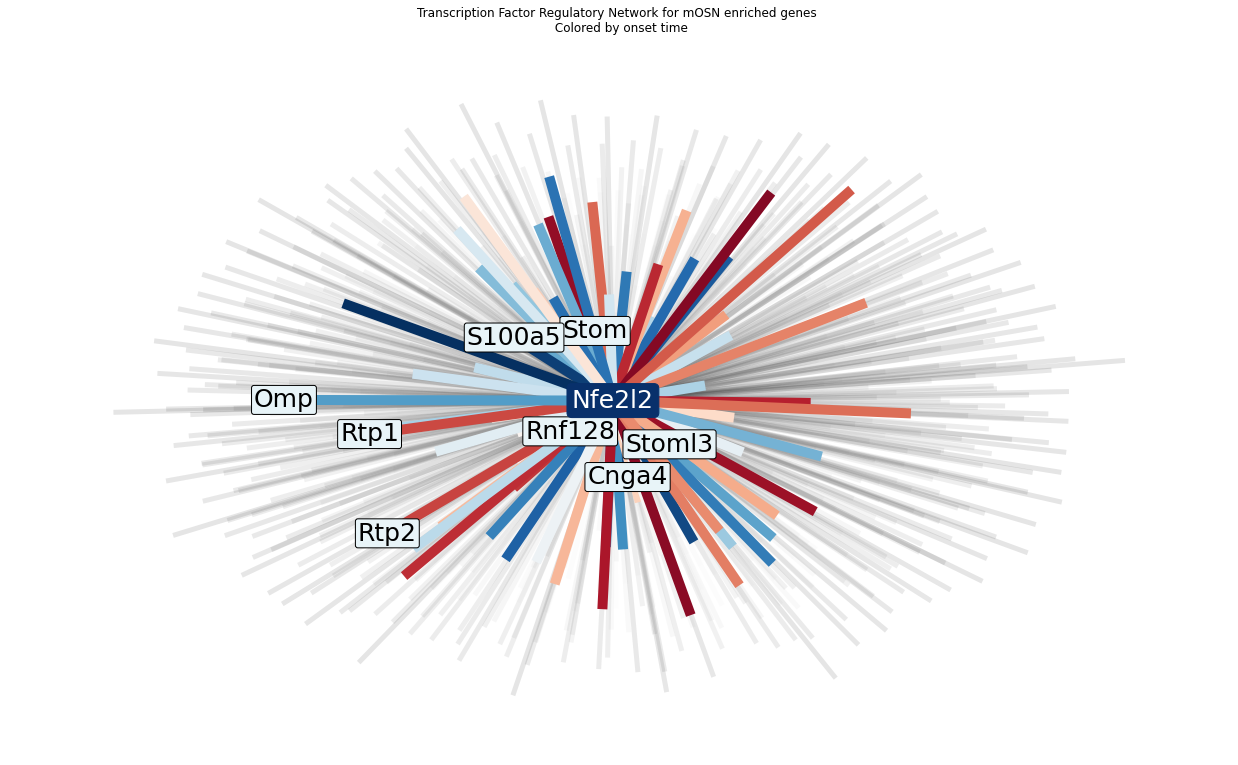

In [151]:
"""
Labels the top 10 genes interacting with the transcription factor from the top_mOSNmarker list
"""



# Select the relevant rows from the network dataframe
# plot_df = network[(network.gene1.isin(top_mOSNmarker)) & (network.gene2.isin(top_mOSNmarker))]
plot_df = network[network.gene1.isin(top_mOSNmarker)]

# Sort the dataframe by MI score in descending order
plot_df = plot_df.sort_values('MI', ascending=False)
# plot_df['MI_log'] = -np.log10(plot_df['MI'])
plot_df['MI_exp'] = 10 ** plot_df['MI']


# Create a directed graph
G = nx.from_pandas_edgelist(plot_df, source='gene1', target='gene2', edge_attr=['MI_exp'])


# Scale node positions based on MI value
pos = nx.spring_layout(G, 
                        weight='MI_exp',
                        scale= 1e1, 
                        seed=14)  


# Plot the graph
plt.figure(figsize=(17, 10))
options = {
    "node_size": 0,
    "edge_color": range(len(G)-1),
    "width": 5,
    "edge_cmap": plt.cm.Greys,
    "alpha": 0.1
}
nx.draw(G, pos=pos, **options)


# Set colors based on onset time. 
color_map = GE_functions.continuous_colors(ge_normalized[top_mOSNmarker].sum().sort_values().index, colormap = 'RdBu_r')
label_edges = list(network[(network.gene1.isin(top_mOSNmarker)) & (network.gene2.isin(top_mOSNmarker))].gene2)

# Draw edges for the top_gene_list with alpha=1
top_edges = [(g1, g2) for g1, g2, d in G.edges(data=True) if g2 in label_edges]
colors = [_color for _, _gene2 in top_edges for _gene, _color in color_map.items() if _gene2 == _gene]
nx.draw_networkx_edges(G, pos, edgelist=top_edges, edge_color=colors, alpha=1, width=10)

# label_list = [i for i in plot_df.gene2 if i in top_mOSNmarker[0:5]] 
label_list = list(plot_df.gene2[0:3])
label_list.extend(['Rtp1','Omp', 'Stoml3', 'Stom', 'S100a5', 'Rtp2'])
label_dict = {gene: gene for gene in label_list if gene in G.nodes()}
nx.draw_networkx_labels(G, pos, label_dict, font_size=25, font_color='black', 
                        bbox=dict(facecolor='#e8f4f8', boxstyle='round,pad=0.1'))

# Draw bounding box labels for specific genes
nx.draw_networkx_labels(G, pos, {'Nfe2l2': 'Nfe2l2'}, font_size=25, font_color='white', 
                        bbox=dict(facecolor=plt.cm.get_cmap('Blues', 5)(4), edgecolor=plt.cm.get_cmap('Blues', 5)(5), boxstyle='round,pad=0.2'))


plt.title('Transcription Factor Regulatory Network for mOSN enriched genes \n Colored by onset time')
# plt.savefig('../output/fig_image/mOSN_analysis/tf_network/nx_mOSNenriched.png')
plt.show()

#### TF network of known ER stress TFs. 

manually define known tf to regulate ER stress. 

 https://doi.org/10.1002/cne.22305
 https://doi.org/10.1016/j.gene.2006.09.027

In [6]:
"""
Iterates through all metrics, select top n of genes and filter for transcription factors 
"""

import os  
files = os.listdir('../expression_csv/')
ge_files = [_file for _file in files if _file.startswith('ge_')]

ge_table_list = {}
mse_table_list = {}
top_rtp1_associated = []
# Read and melt the gene expression data matrix 
for _file in ge_files: 
    _key = '_'.join(_file.split('GSE')[0].split('_')[0:3])
    ge_table_list[_key] = pd.read_csv(os.path.join('../expression_csv', _file), index_col = 0)
    mse_table_list[_key] = GE_functions.get_rmse_table(ge_table_list[_key].set_index('index'), 'Rtp1')
    top_rtp1_associated.extend(list(mse_table_list[_key].rank().sort_values()[1:300].index))

cloned_genes = list(pd.read_csv('../output/cloned_genes.csv')['0'])

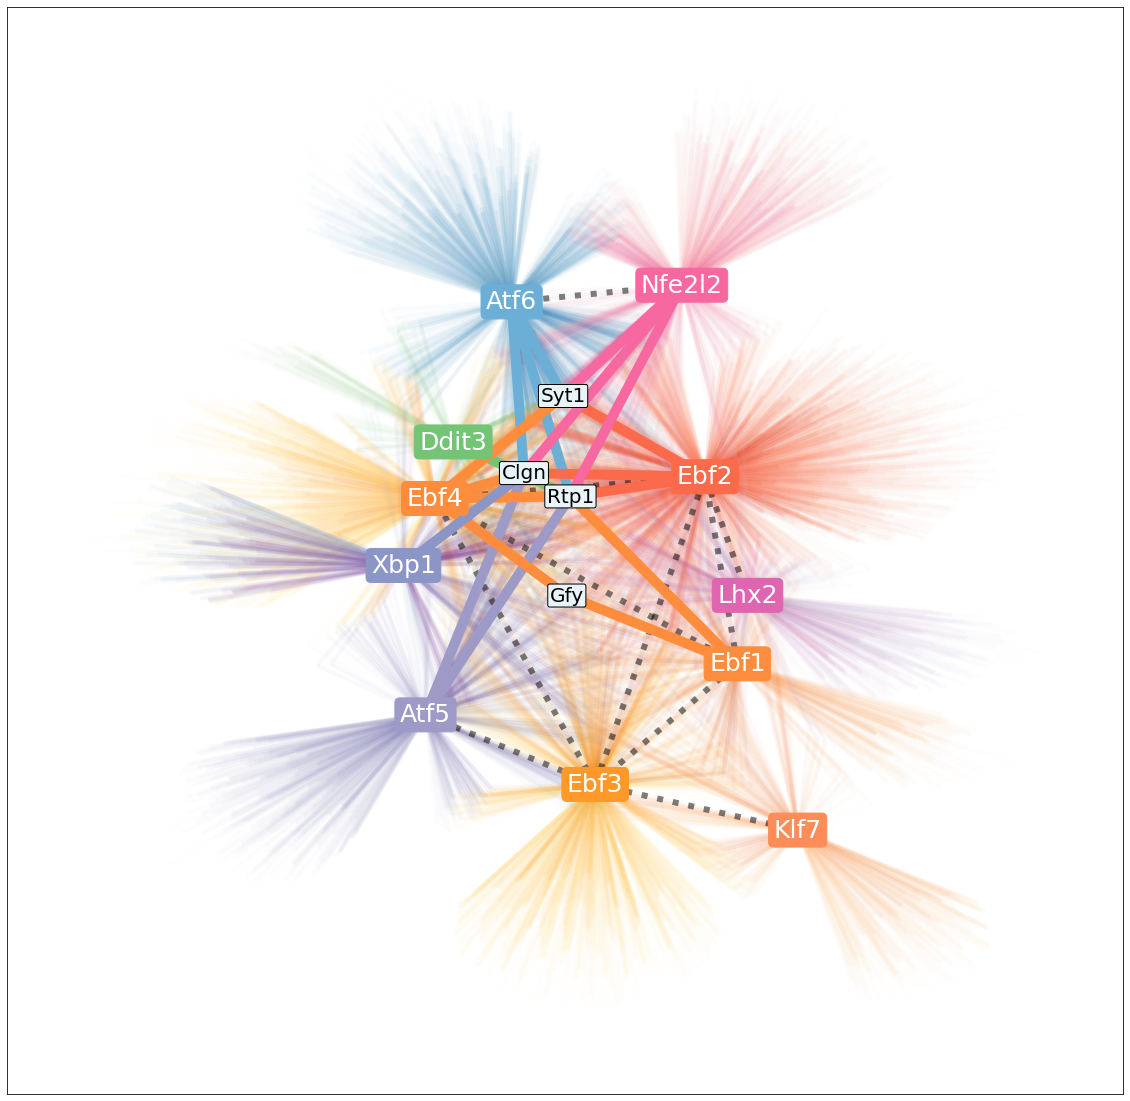

In [359]:
"""
Network plot for known ER stress tf. 

"""
# Select the relevant rows from the network dataframe
tf_list = ['Atf5', 'Atf6', 'Lhx2', 'Klf7', 
           'Ebf1', 'Ebf2', 'Ebf3', 'Ebf4',
           'Nfe2l2', 'Ddit3', 'Xbp1']
plot_df = network[network.gene1.isin(tf_list)]
# plot_df = network[network.gene1.isin(['Ebf4', 'Ddit3', 'Xbp1'])]

# Sort the dataframe by MI score in descending order
plot_df = plot_df.sort_values(['gene1', 'MI'])
plot_df['MI_exp'] = 10 ** plot_df['MI']

# Create a directed graph
G = nx.from_pandas_edgelist(plot_df, source='gene1', target='gene2', edge_attr=['MI_exp'])

# Scale node positions based on MI value
pos = nx.spring_layout(G, weight='MI_exp', 
                       scale = 1e1, 
                       seed = 7)  # Scale node positions by a factor of 100

# Set node attributes
cmaps = ['Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
         'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
         'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

# Plot the graph
plt.figure(figsize=(20, 20))

cloned_genes =  ['Gfy', 'Rtp1', 'Clgn', 'Syt1', 'Syt5']
# Manually draw each tf network 
for i, _gene in enumerate(plot_df.gene1.sort_values().unique()):
    # label center tf
    labels = {_gene: _gene} 
    nx.draw_networkx_labels(G, pos, labels, font_size=25, font_color='White', 
                        bbox=dict(facecolor=plt.cm.get_cmap(cmaps[i], 5)(2), 
                                  edgecolor=plt.cm.get_cmap(cmaps[i], 5)(2), 
                                  boxstyle='round,pad=0.2'))
    
    # Draw all edges for tf
    all_edges = [(u,v,_) for u,v,_ in G.edges(data = True) if (_gene in [u,v]) & ~((u in cloned_genes) | (v in cloned_genes))]
    nx.draw_networkx_edges(G, pos, edgelist=all_edges, 
                           edge_cmap=plt.cm.get_cmap(cmaps[i]), 
                           edge_color=[x[2]['MI_exp'] for x in all_edges], 
                           alpha=0.05, width=4)
    
    
# Draw edges for the tf-tf interactions
top_edges = [(u,v) for u,v in G.edges() if ((u in tf_list) & (v in tf_list))]
nx.draw_networkx_edges(G, pos, edgelist=top_edges, edge_color='black', style=':', alpha=0.5, width=6)

# Re-iterate loop to draw heavy edges on top 
for i, _gene in enumerate(plot_df.gene1.sort_values().unique()):
    # Draw edges for the top_gene_list with alpha=1
    top_edges = [(u,v) for u,v in G.edges() if (_gene in [u,v]) & ((u in cloned_genes) | (v in cloned_genes))]
    edge_colors = [plt.cm.get_cmap(cmaps[i], 5)(2) for _ in top_edges]
    nx.draw_networkx_edges(G, pos, 
                           edgelist=top_edges, 
                           edge_color=edge_colors, 
                           alpha=1, width=10)
    
# label tf associated genes 
label_gene_list = [i for i in plot_df.gene2 if i in cloned_genes]
label_dict = {gene: gene for gene in label_gene_list if gene in G.nodes()}
nx.draw_networkx_labels(G, pos, label_dict, font_size=20, font_color='black', 
                        bbox=dict(facecolor='#e8f4f8', boxstyle='round,pad=0.1'))

plt.savefig('../output/fig_image/mOSN_analysis/tf_network/nx_ERstress.png')
plt.show()

In [25]:
tf_list = ['Atf5', 'Atf6', 'Ddit3', 'Ebf1', 'Ebf2', 'Ebf3', 'Ebf4', 'Nfe2l2', 'Xbp1']

temp = network[network.gene1.isin(tf_list)]
temp['genes'] = temp['gene1'] + '_' + temp['gene2']
temp = {_gene: len(temp[temp['gene2']==_gene]) for _gene in temp.gene2}
pd.DataFrame(sorted(temp.items(), key=lambda x: x[1], reverse=True), columns = ['gene', 'n_ERstressTF_interaction']).to_csv('../output/cloned_genes_ERstress_contact.csv', index=0)

/tmp/ipykernel_2934758/2034673150.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['genes'] = temp['gene1'] + '_' + temp['gene2']


In [32]:
pd.DataFrame(sorted(temp.items(), key=lambda x: x[1], reverse=True), columns = ['gene', 'n_ERstressTF_interaction']).head(20)

gene  n_ERstressTF_interaction
0   Mapk8ip2                         7
1       Rtp1                         7
2     Elmod3                         7
3      Kcnh3                         6
4       Nsg1                         6
5       Rtp2                         6
6    Ccdc157                         6
7      Map1a                         6
8       Clgn                         6
9    Fam217a                         6
10     Pde6d                         6
11      Cnst                         5
12      Gnb1                         5
13      Gnal                         5
14  Rap1gds1                         5
15     Gng13                         5
16    Impdh1                         5
17     Cnga2                         5
18   Fam149a                         5
19     Scrn1                         5

/tmp/ipykernel_2934758/1473586809.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['genes'] = temp['gene1'] + '_' + temp['gene2']


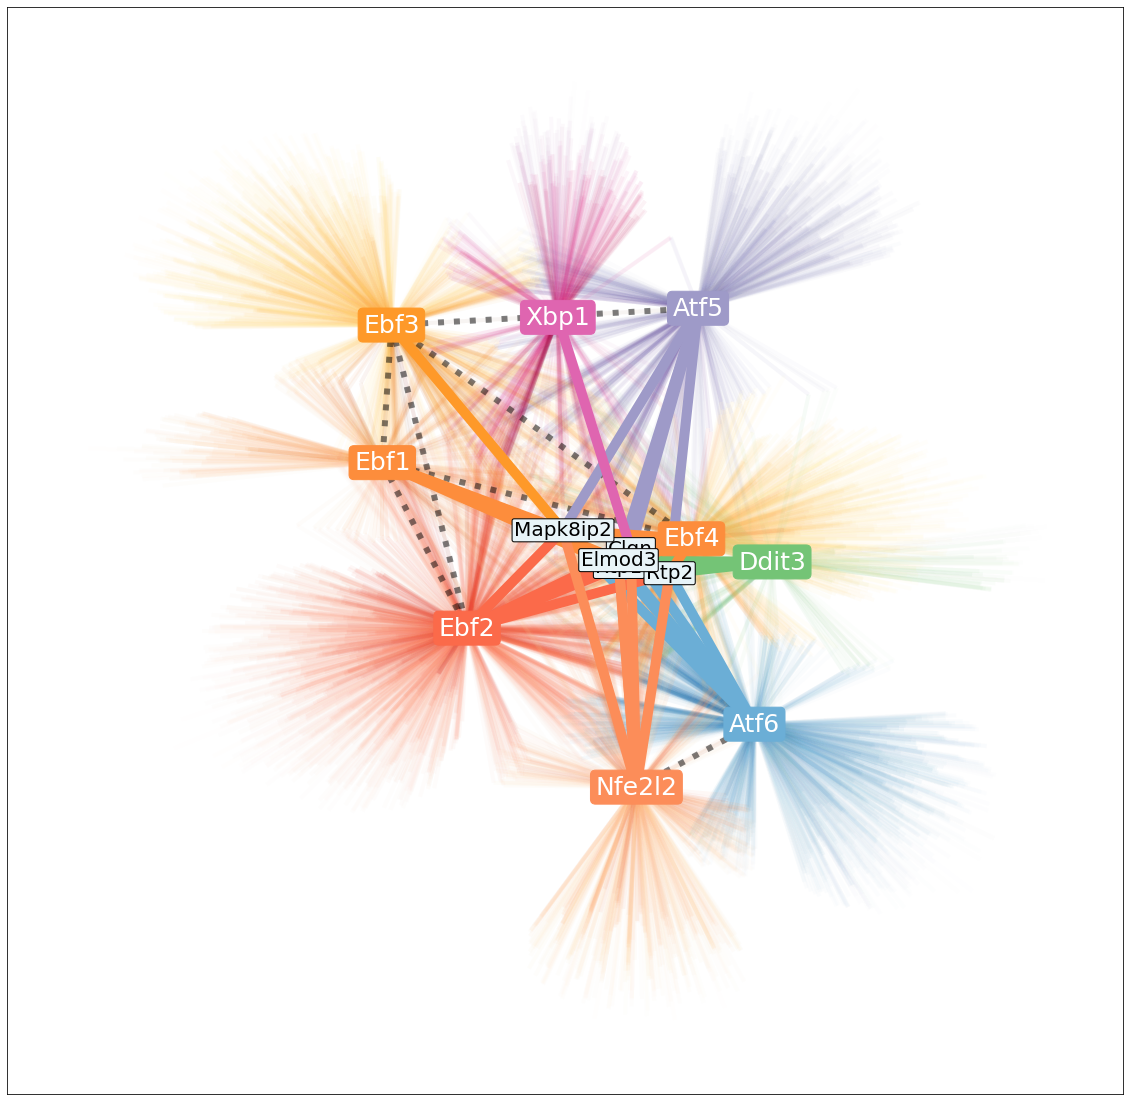

In [36]:
"""
Network plot for known ER stress tf. 

Plotting top 5 most interacted cloned genes 

"""
# Select the relevant rows from the network dataframe
tf_list = ['Atf5', 'Atf6', 'Ddit3', 'Ebf1', 'Ebf2', 'Ebf3', 'Ebf4', 'Nfe2l2', 'Xbp1']
plot_df = network[network.gene1.isin(tf_list)]

# Sort the dataframe by MI score in descending order
plot_df = plot_df.sort_values(['gene1', 'MI'])
plot_df['MI_exp'] = 10 ** plot_df['MI']

# Create a directed graph
G = nx.from_pandas_edgelist(plot_df, source='gene1', target='gene2', edge_attr=['MI_exp'])

# Scale node positions based on MI value
pos = nx.spring_layout(G, weight='MI_exp', 
                       scale = 1e1, 
                       seed = 0)  # Scale node positions by a factor of 100

# Set node attributes
cmaps = ['Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
         'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
         'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

# Plot the graph
plt.figure(figsize=(20, 20))

# Pick the top 5 most contacted cloned_genes in network. Excluding TFs
temp = network[network.gene1.isin(tf_list)]
temp['genes'] = temp['gene1'] + '_' + temp['gene2']
temp = {_gene: len(temp[temp['gene2']==_gene]) for _gene in temp.gene2}
temp = sorted(temp.items(), key=lambda x: x[1], reverse=True)
plot_genes = [_tup[0] for _tup in temp[0:10]]
plot_genes = ['Clgn','Rtp1', 'Rtp2','Mapk8ip2', 'Elmod3']


# Manually draw each tf network 
for i, _gene in enumerate(plot_df.gene1.sort_values().unique()):
    # label center tf
    labels = {_gene: _gene} 
    nx.draw_networkx_labels(G, pos, labels, font_size=25, font_color='White', 
                        bbox=dict(facecolor=plt.cm.get_cmap(cmaps[i], 5)(2), 
                                  edgecolor=plt.cm.get_cmap(cmaps[i], 5)(2), 
                                  boxstyle='round,pad=0.2'))
    
    # Draw all edges for tf
    all_edges = [(u,v,_) for u,v,_ in G.edges(data = True) if (_gene in [u,v]) & ~((u in plot_genes) | (v in plot_genes))]
    nx.draw_networkx_edges(G, pos, edgelist=all_edges, 
                           edge_cmap=plt.cm.get_cmap(cmaps[i]), 
                           edge_color=[x[2]['MI_exp'] for x in all_edges], 
                           alpha=0.05, width=4)
    
    
# Draw edges for the tf-tf interactions
top_edges = [(u,v) for u,v in G.edges() if ((u in tf_list) & (v in tf_list))]
nx.draw_networkx_edges(G, pos, edgelist=top_edges, edge_color='black', style=':', alpha=0.5, width=6)

# Re-iterate loop to draw heavy edges on top 
for i, _gene in enumerate(plot_df.gene1.sort_values().unique()):
    # Draw edges for the top_gene_list with alpha=1
    top_edges = [(u,v) for u,v in G.edges() if (_gene in [u,v]) & ((u in plot_genes) | (v in plot_genes))]
    edge_colors = [plt.cm.get_cmap(cmaps[i], 5)(2) for _ in top_edges]
    nx.draw_networkx_edges(G, pos, 
                           edgelist=top_edges, 
                           edge_color=edge_colors, 
                           alpha=1, width=10)
    
# label tf associated genes 
label_gene_list = [i for i in plot_df.gene2 if i in plot_genes]
label_dict = {gene: gene for gene in label_gene_list if gene in G.nodes()}
nx.draw_networkx_labels(G, pos, label_dict, font_size=20, font_color='black', 
                        bbox=dict(facecolor='#e8f4f8', boxstyle='round,pad=0.1'))

# plt.savefig('../output/fig_image/mOSN_analysis/tf_network/nx_ERstress_top5.png')
plt.show()

In [ ]:
# Pick the top 5 most contacted cloned_genes in network. Excluding TFs
temp = network[network.gene1.isin(tf_list)]
temp['genes'] = temp['gene1'] + '_' + temp['gene2']
# temp = {i: len(temp[temp['genes'].str.contains(i)]) for i in cloned_genes }
temp = {_gene: temp[_gene] for _gene in temp if _gene not in tf_list}
temp = sorted(temp.items(), key=lambda x: x[1])
plot_genes = [_tup[0] for _tup in temp[-10:]]

In [31]:
# Generates dataframe of top ER tf interating genes
temp = network[network.gene1.isin(tf_list)]
temp['genes'] = temp['gene1'] + '_' + temp['gene2']
temp2 = {i: len(temp[temp['gene2'] == i]) for i in temp.gene2.unique() }
temp2 = sorted(temp2.items(), key=lambda x: x[1], reverse=True)
pd.DataFrame(temp2, columns=['gene', 'n_ER_tf_connections']).to_csv('../output/brann/ER_tf_connections.csv')

/tmp/ipykernel_1391679/3195189991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['genes'] = temp['gene1'] + '_' + temp['gene2']


#### TF of top n of genes across metrics 

In [ ]:
# """
# OLD DEPRECATED 
# Labels the top 10 genes interacting with the transcription factor from the top_mOSNmarker list
# """


# # Select the relevant rows from the network dataframe
# plot_df = network[network.gene1.isin(top_mOSNmarker)]

# # Sort the dataframe by MI score in descending order
# plot_df = plot_df.sort_values('MI')



# # Create a directed graph
# G = nx.from_pandas_edgelist(plot_df, source='gene1', target='gene2', edge_attr=['MI'])

# # Scale node positions based on MI value
# pos = nx.spring_layout(G, weight='MI',
#                        seed=0)  # Scale node positions by a factor of 100

# # Set node attributes
# colors = range(len(G)-1)

# # Plot the graph
# plt.figure(figsize=(20, 20))
# options = {
#     "node_size": 0,
#     "edge_color": colors,
#     "width": 4,
#     "edge_cmap": plt.cm.Blues,
#     "alpha": 0.3
# }
# nx.draw(G, pos=pos, with_labels=False, node_shape="s", node_color="none", **options)


# top_gene_list = [i for i in plot_df.gene2 if i in top_mOSNmarker[0:10]] 
# # Draw bounding box labels for specific genes
# nx.draw_networkx_labels(G, pos, {'Nfe2l2': 'Nfe2l2'}, font_size=25, font_color='white', 
#                         bbox=dict(facecolor=plt.cm.get_cmap('Blues', 5)(4), edgecolor=plt.cm.get_cmap('Blues', 5)(5), boxstyle='round,pad=0.2'))

# label_dict = {gene: gene for gene in top_gene_list if gene in G.nodes()}
# nx.draw_networkx_labels(G, pos, label_dict, font_size=25, font_color='black', 
#                         bbox=dict(facecolor='#e8f4f8', edgecolor=plt.cm.get_cmap('Blues', 5)(5), boxstyle='round,pad=0.2'))

# # Draw edges for the top_gene_list with alpha=1
# top_edges = [(g1, g2) for g1, g2, d in G.edges(data=True) if g2 in top_gene_list]
# nx.draw_networkx_edges(G, pos, edgelist=top_edges, edge_color=plt.cm.get_cmap('Blues', 5)(5), alpha=1, width=5)

# plt.title('Transcription Factor Regulatory Network for mOSN enriched genes \nlabeled top 20 TF highest score')
# # plt.savefig('../output/fig_image/mOSN_analysis/tf_network/nx_mOSNenriched.png')
# plt.show()

In [ ]:
"""
Iterates through all metrics, select top n of genes and filter for transcription factors 
"""

import os  
files = os.listdir('../expression_csv/')
ge_files = [_file for _file in files if _file.startswith('ge_')]

ge_table_list = {}
mse_table_list = {}
top_rtp1_associated = []
# Read and melt the gene expression data matrix 
for _file in ge_files: 
    _key = '_'.join(_file.split('GSE')[0].split('_')[0:3])
    ge_table_list[_key] = pd.read_csv(os.path.join('../expression_csv', _file), index_col = 0)
    mse_table_list[_key] = GE_functions.get_rmse_table(ge_table_list[_key].set_index('index'), 'Rtp1')
    top_rtp1_associated.extend(list(mse_table_list[_key].rank().sort_values()[1:300].index))

cloned_genes = list(pd.read_csv('../output/cloned_genes.csv')['0'])

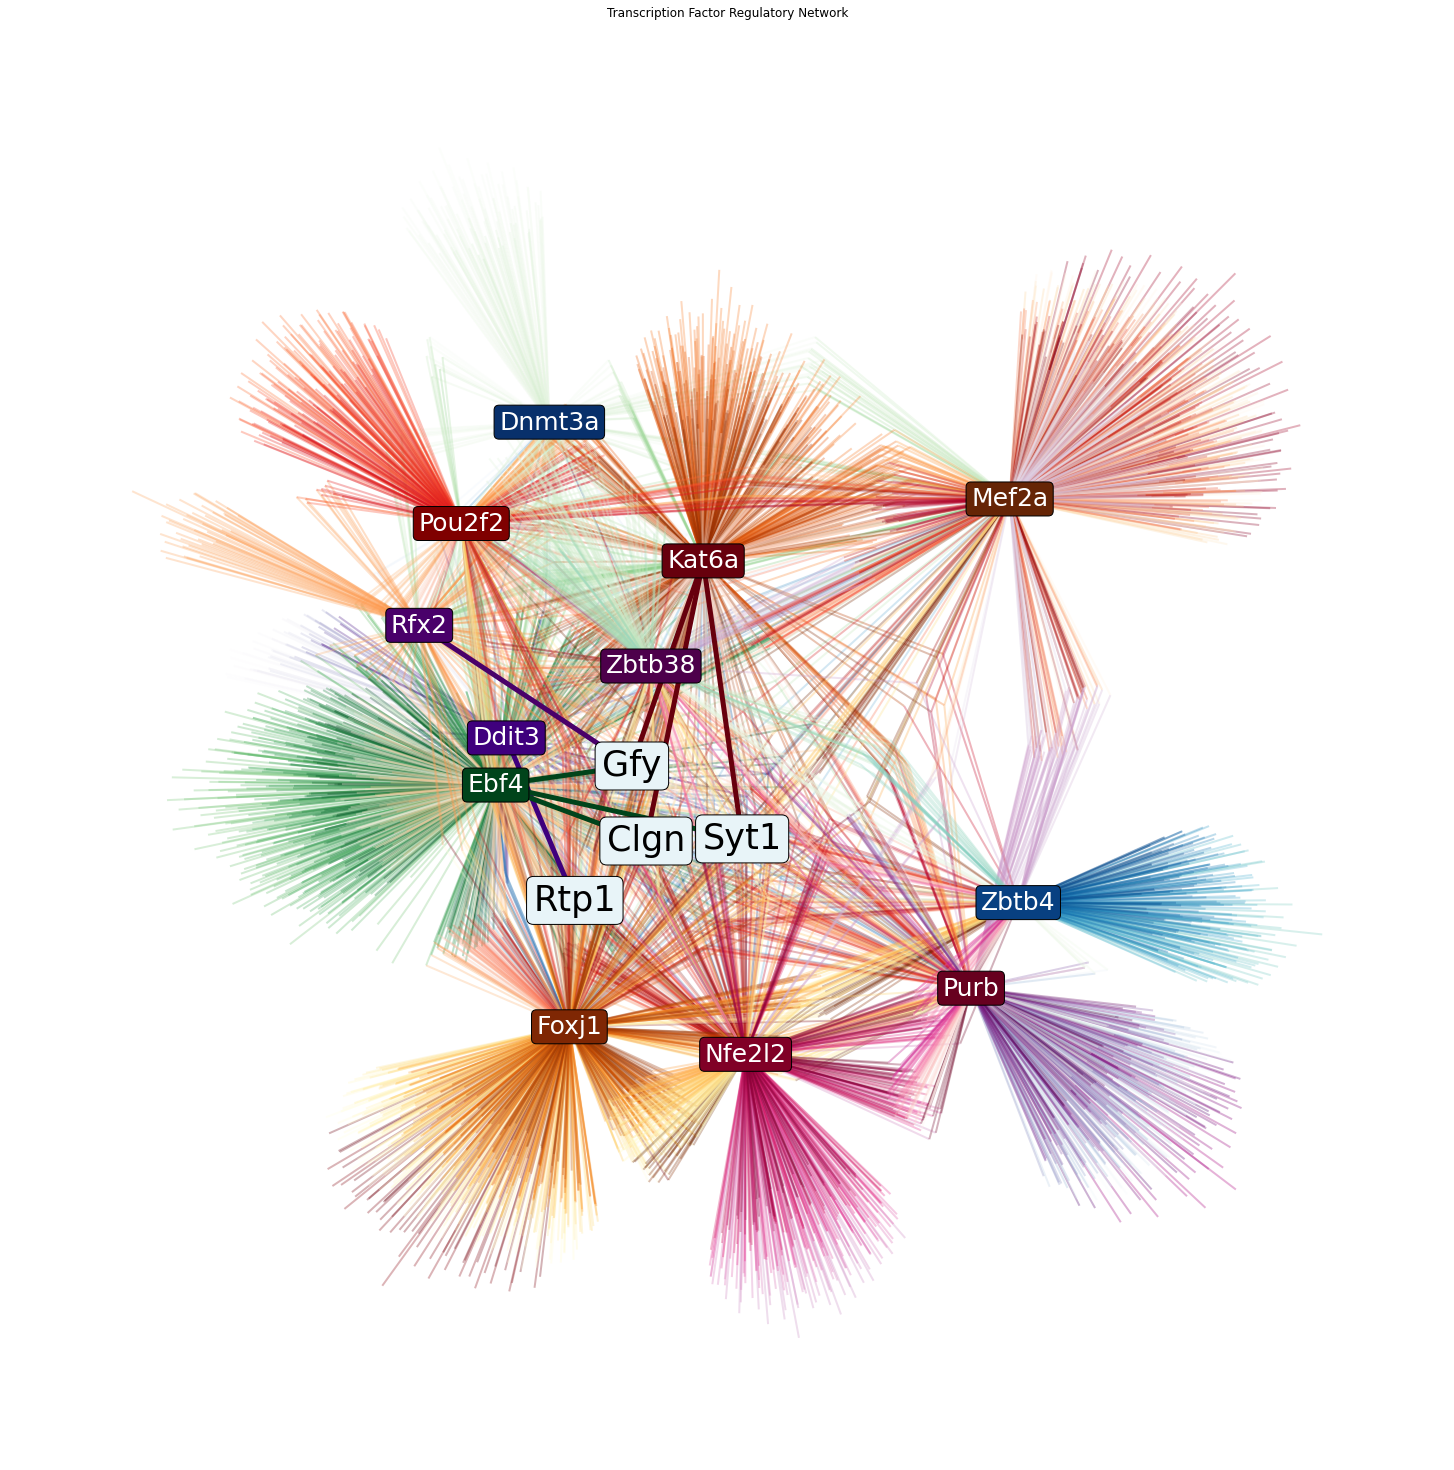

In [140]:
# Assuming you have defined 'top_mOSNmarker' and 'network' somewhere in your code


# Select the relevant rows from the network dataframe
# plot_df = network[network.gene1.isin(genes)]
plot_df = network[network.gene1.isin(['Kat6a','Nfe2l2','Purb','Ddit3','Foxj1','Dnmt3a',
                                      'Ebf4','Pou2f2','Zbtb4','Rfx2',
                                      'Zbtb38','Mef2a'])]

# Sort the dataframe by MI score in descending order
plot_df = plot_df.sort_values(['gene1', 'MI'])

# Create a directed graph
G = nx.from_pandas_edgelist(plot_df, source='gene1', target='gene2', edge_attr=['MI'])

# Scale node positions based on MI value
pos = nx.spring_layout(G, weight='MI', scale = 1e10, seed = 3)  # Scale node positions by a factor of 100

# Set node attributes
cmaps = ['Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
         'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
         'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
colors = []
for i, _gene in enumerate(plot_df.gene1.sort_values().unique()): 
    _ = [colors.append(value) for key, value in GE_functions.continuous_colors(plot_df[plot_df.gene1 == _gene].MI, colormap = cmaps[i]).items()]

# Plot the graph
plt.figure(figsize=(20, 20))
options = {
    "node_size": 0,
    "node_color": "#A0CBE2",
    "edge_color": colors,
    "alpha": 0.5, 
    "width": 2,
    "alpha": 0.3,
}
nx.draw(G, pos, **options)

# manual_color = ['#FF8A8A', '#89CFF0', '#D7A1F9']
# manual_color = GE_functions.distinct_colors(plot_df.gene1.unique())
cloned_genes =  ['Gfy', 'Rtp1', 'Clgn', 'Syt1', 'Syt5']
# cloned_genes = list(pd.read_csv('../output/cloned_genes.csv')['0'])

for i, _gene in enumerate(plot_df.gene1.sort_values().unique()):
    # label center tf
    labels = {_gene: _gene} 
    nx.draw_networkx_labels(G, pos, labels, font_size=25, font_color='White', 
                        bbox=dict(facecolor=plt.cm.get_cmap(cmaps[i], 5)(5), boxstyle='round,pad=0.2'))
    
    # Draw edges for the top_gene_list with alpha=1
    top_edges = [(g1, g2) for g1, g2, d in G.edges(data=True) if (g2 in cloned_genes) & (g1 == _gene)]
    nx.draw_networkx_edges(G, pos, edgelist=top_edges, edge_color=plt.cm.get_cmap(cmaps[i], 5)(5), alpha=1, width=5)
    
    
# label tf associated genes 
label_gene_list = [i for i in plot_df.gene2 if i in cloned_genes]
label_dict = {gene: gene for gene in label_gene_list if gene in G.nodes()}
nx.draw_networkx_labels(G, pos, label_dict, font_size=35, font_color='black', 
                        bbox=dict(facecolor='#e8f4f8', boxstyle='round,pad=0.2'))





plt.title('Transcription Factor Regulatory Network')
# plt.savefig('../output/fig_image/mOSN_analysis/tf_network/nx_cloned_genes.png')
plt.savefig('../output/fig_image/mOSN_analysis/tf_network/nx_Rtp1_associated.png')
plt.show()

In [218]:
"""
Plot cloned genes here to see how they are represented in stress vs non stress mOSN
"""
cloned_genes = list(pd.read_csv('../output/cloned_genes.csv')['0'])
msviper_out = pd.read_table('../files/Shayya/aracneviper/msviper_out.tsv', sep='\t')
msviper_out[msviper_out.Regulon.isin(cloned_genes)]


# Result was not that interesting . . .

Regulon   NES_avg       p.value  size           fdr
87    Ddit3  2.449139  3.351564e-11   157  2.537134e-08
114    Ebf2 -0.132590  1.398438e-05  1608  1.643701e-03
116    Ebf4 -0.384717  8.363482e-03  1038  8.555616e-02

### Now that we seperated mOSN markers into early and late, expore the bins to see if they posses different signature in different datasets: 
#### - covid RNAseq DE volcano 
#### - GO analysis 
#### - Lomvardas cell differently stressed express these differently ? 

### Zazhytska

In [4]:
hOE_DE = pd.read_csv('../files/Zazhytska/hOE_deseq2.csv', index_col=0)

In [ ]:

plot_df = hOE_DE.copy()

fig = go.Figure()
# plot padj > 0.05
temp = plot_df
fig.add_trace(go.Scatter(x=temp['log2FoldChange'], 
                        y=-np.log10(temp['padj']),
                        text=temp.index,
                        mode='markers', 
                        name='padj > 0.05',
                        marker=dict(color = 'grey', opacity=0.3)))

# plot screening genes
temp = plot_df[list(plot_df.index.isin([i.upper() for i in marker_df['mOSN_names'].to_list()]))]
# Assign color_map to the marker temp dataframe 
for i in color_map.keys():
    temp.loc[temp.index == i.upper(), ['normalized_AUC','color']] = color_map[i]
temp.normalized_AUC = temp.normalized_AUC.astype('string')

fig.add_trace(go.Scatter(x=temp['log2FoldChange'], 
                        y=-np.log10(temp['padj']),
                        text=temp.index + '<br>Normalized onset: ' + temp.normalized_AUC,
                        textposition='top center',
#                         mode='markers+text', 
                        mode = 'markers',
                        name='mOSN markers',
                        marker=dict(color = temp.color,
                                    opacity= 0.5,
                                   size = 15)))


fig.update_traces( 
    textposition='top center',
    hovertemplate =
    '<b>%{text}</b>' + 
    '<br>LogFC: %{y}'+
    '<br>FDR: %{x}<br>')

fig.update_layout(
    xaxis_range = [-7, 7],

    title='mOSN markers are downregulated in covid infected OE<br>\
    <span style="font-size: 10px;">From Zazhytska et al. hOE_deseq2</span>',
    yaxis = {'title' : '-np.log10(padj)'},
    xaxis = {'title' : 'logfc'},
#     autosize=True,
#     width=800,
#     height=800,
    template='simple_white',
    font=dict(
        size=10,  # Set the font size here
    )
)
fig.show()
#
# fig.write_html("../output/mOSNmarker_analysis/Zazhytska_mOSNmarker-Rdbu.html")

In [11]:
"""
Manually create a sizemap for plotting in plotly line
size map created similar as colormap. But instead of expression scaled between 0 and 1, 
pvalue is used to scale between 0 and 1. 
"""
top_mOSNmarker_pvalue_dict = {}
for i in hOE_DE.iloc[hOE_DE.index.isin([i.upper() for i in top_mOSNmarker])].index:
    top_mOSNmarker_pvalue_dict[i] = hOE_DE.iloc[hOE_DE.index == i].padj.item()

# Scale between 0 and 4 for better visualization.
top_mOSNmarker_pvalue = [pvalue + 4 for pvalue in GE_functions.reverse_scale(list(top_mOSNmarker_pvalue_dict.values()), 
                                                                             factor = 4)]

for i in enumerate(top_mOSNmarker_pvalue_dict.keys()):
    top_mOSNmarker_pvalue_dict[i[1]] = top_mOSNmarker_pvalue[i[0]]

In [ ]:
"""
Plotting bar plot of mOSN markers across ER stress logfc to
better visualize the onset phenotype over stressed cells
"""
plot_df = hOE_DE.copy()
plot_df = plot_df[list(plot_df.index.isin([i.upper() for i in marker_df['mOSN_names'].to_list()]))]
# Assign color_map and pvalue_size to the marker plot_df dataframe 
for i in plot_df.index:
    plot_df.loc[plot_df.index == i, ['normalized_AUC','color']] = color_map[i.capitalize()]
    plot_df.loc[plot_df.index == i, ['pvalue_size']] = top_mOSNmarker_pvalue_dict[i]
# Manually adjust significant size to much bigger
plot_df.loc[plot_df.padj < 0.05, 'pvalue_size'] = 8
    
fig = go.Figure()
for gene in plot_df.index:
    fig.add_trace(go.Scatter(
                            x = plot_df.iloc[plot_df.index == gene]['log2FoldChange'], 
                            y = plot_df.iloc[plot_df.index == gene]['normalized_AUC'],
                            text = plot_df.iloc[plot_df.index == gene].index + '<br>padj: ' + 
                                        str(plot_df.iloc[plot_df.index == gene]['padj'].item()),
                            textposition='top center',
                            mode = 'markers',
                            name='early markers',
                            marker=dict(color = plot_df.iloc[plot_df.index == gene]['color'],
#                                         CHANGE *VALUE HERE TO ADJUST SIZE 
                                        size = plot_df.iloc[plot_df.index == gene]['pvalue_size']*5
                                       ),
                            showlegend = False
                            )
                 )
from scipy import stats
# Calculate Pearson Correlation 
temp = plot_df[plot_df.padj < 0.05]
x = temp['log2FoldChange'].values
y = temp['normalized_AUC'].values
r, r_p = stats.pearsonr(x, y)

# fit trendline using linear regression
coeffs = np.polyfit(x, y, 1)
# x coordinates can be adjusted here to elongate or shorten the line
trendline_x = np.array([
#                         x.min(), 
#                         x.max()
                        -6,
                        2
                       ])
trendline_y = coeffs[0] * trendline_x + coeffs[1]
# fit a line to the data using the slope-intercept formula
m = r * (np.std(y) / np.std(x))
b = np.mean(y) - m * np.mean(x)
# Add a line for the correlation coefficient
fig.add_trace(go.Scatter(x = trendline_x,
                         y = trendline_y,
                         mode='lines', 
                         line = dict(
                             dash='dot',
                             width = 5,
                             color = 'rgba(0, 0, 0, 0.3)'
                         ),
                         name='Pearson correlation: {} <br>Pearson p-value: {}'.format(round(r,3), 
                                                                                round(r_p, 5)),
#                          showlegend=False
                        )
             )    
    

fig.update_traces( 
    textposition='top center',
    hovertemplate =
    '<b>%{text}</b>' + 
    '<br>LogFC: %{y}'+
    '<br>FDR: %{x}<br>')

fig.update_layout(
    xaxis_range = [-7, 7],
    yaxis = {'title' : 'Normalized gene AUC'},
    xaxis = {'title' : 'logfc'},
    title='mOSN markers are downregulated in covid infected OE<br>\
    <span style="font-size: 10px;">From Zazhytska et al. hOE_deseq2</span>',
#     autosize=True,
#     width=800,
#     height=800,
    template='simple_white',
    font=dict(
        size=10,  # Set the font size here
    )
)
fig.show()
# fig.write_html("../output/mOSNmarker_analysis/Zazhytska_mOSNmarker_onsetgraph-Rdbu.html")

#### Cloned genes correlation 

Since there is no correlation between mOSN enriched genes onset latency and covid. 
Investigate if there is correlation between covid and genes co-expressed with Rtp1

In [18]:
ge_normalized = pd.read_csv('../expression_csv/ge_normalized_GSE151346_MOE_ALL_OlfrSum.csv', 
                            index_col=0)

In [19]:
plot_df = hOE_DE.copy()

plot_df['color'] = '#D3D3D3'

for _gene in color_map: 
    plot_df.loc[plot_df.index == _gene.upper(), 'color'] = color_map[_gene]


In [32]:
# cloned_genes = list(pd.read_csv('../output/cloned_genes.csv')['0'])


cloned_genes = ['Acsl6','Aplp2','Brdt','Ccdc184','Cfap100','Cfap206','Chga',
                'Chgb','Clgn','Clstn2','Ddit3','Ebf2','Ebf4','Efcab10','Efna3',
                'Ephx4','Esyt2','Faim2','Fam217a','Flrt1','Gfy','Gpx6',
                'Herpud1','Hspa12a','Jakmip1','Jph4','Klhl5','Lingo2',
                'Manea','Pde6d','Rd3','Rtbdn','Serpine2','Slc24a2',
                'Syt1','Syt5','Rtp1', 'Rtp2'] # Filtered list, excludes extra Syt members 
# cloned_genes = ['Rtp1', 'Gfy', 'Clgn','Syt1', 'Syt5']

tf_list = ['Atf5', 'Atf6', 'Lhx2', 'Klf7', 
           'Ebf1', 'Ebf2', 'Ebf3', 'Ebf4',
           'Nfe2l2', 'Ddit3', 'Xbp1']

# color_map by Rtp1 rmse 
color_map = GE_functions.continuous_colors(GE_functions.get_rmse_table(ge_normalized[cloned_genes], 'Rtp1').sort_values().index, 
                                           colormap = 'viridis_r')



plot_df = hOE_DE.copy()

# Assign colors 
plot_df['color'] = '#D3D3D3'
for _gene in color_map: 
    plot_df.loc[plot_df.index == _gene.upper(), 'color'] = color_map[_gene]


fig = go.Figure()
# plot padj > 0.05
temp = plot_df[list(~plot_df.index.isin([i.upper() for i in (cloned_genes + tf_list)]))]
fig.add_trace(go.Scatter(x=temp['log2FoldChange'], 
                        y=-np.log10(temp['padj']),
                        text=temp.index,
                        mode='markers', 
                        name='padj > 0.05',
                        marker=dict(color = '#D3D3D3', 
                                    opacity=0.3)))

# plot screening genes
temp = plot_df[list(plot_df.index.isin([i.upper() for i in cloned_genes]))]
# Assign color_map to the marker temp dataframe 
fig.add_trace(go.Scatter(x=temp['log2FoldChange'], 
                        y=-np.log10(temp['padj']),
                        text=temp.index ,
                        textposition='top center',
                        mode = 'markers',
                        name='Cloned_genes',
                        marker=dict(color = "#b3de69", 
                                    opacity= 0.8,
                                   size = 10)))

temp = plot_df[list(plot_df.index.isin([i.upper() for i in tf_list]))]
# Assign color_map to the marker temp dataframe 
fig.add_trace(go.Scatter(x=temp['log2FoldChange'], 
                        y=-np.log10(temp['padj']),
                        text=temp.index ,
                        textposition='top center',
                        mode = 'markers',
                        name='ER_stress_TF',
                        marker=dict(color = "#80b1d3", 
                                    opacity= 0.8,
                                   size = 10)))


fig.update_traces( 
    textposition='top center',
    hovertemplate =
    '<b>%{text}</b>' + 
    '<br>LogFC: %{y}'+
    '<br>FDR: %{x}<br>')

fig.update_layout(
    xaxis_range = [-7, 7],

    title=' <br>\
    <span style="font-size: 10px;">From Zazhytska et al. hOE_deseq2</span>',
    yaxis = {'title' : '-np.log10(padj)'},
    xaxis = {'title' : 'logfc'},
#     autosize=True,
#     width=800,
#     height=800,
    template='simple_white',
    font=dict(
        size=10,  # Set the font size here
    )
)
fig.show()
# fig.write_html('../output/fig_image/mOSN_analysis/covid/vol_covid_hOE.html')


### GO_analysis

See how the early vs late mOSN markers differ in GO analysis 

In [ ]:
# Import GO_tools and initialize GO functions. May take a few seconds. 
import GO_tools
reload(GO_tools)

In [ ]:
"""
Conduct GO analysis on all the columns in GeneSets from different anlaysis
into the df dictionary 
"""
# Quickly bin early and late markers based on normalized auc 
early_markers = []
late_markers = []
for i in color_map.keys():
    if color_map[i][0] > 0.5: 
        early_markers.append(i)
    else: 
        late_markers.append(i)

df = {}
df['top_mOSNmarker'] = GO_tools.go_it(top_mOSNmarker)
df['top_mOSNmarker']['n_genes/n_go'] = df['top_mOSNmarker'].n_genes/df['top_mOSNmarker'].n_go
df['top_mOSNmarker']['n_genes/n_study'] = df['top_mOSNmarker'].n_genes/df['top_mOSNmarker'].n_study

In [ ]:
"""
Assign every go_term with an 'Average' expression AUC. 
Then the all the go_terms' average AUC are then scaled to color 
"""
go_df = df['top_mOSNmarker'].copy()

for i in go_df.index:
    temp = []
    for j in go_df.iloc[i]['study_genes']:
        temp.append(color_map[j][0])
    temp = sum(temp)/len(temp)
    go_df.loc[i,'avg_exp'] = temp
    
go_df = go_df.sort_values('avg_exp')
go_df['color'] = GE_functions.get_color('Rdbu', go_df['avg_exp'])


In [ ]:
plot_df = go_df.copy()

# Create a figure and plot it
fig = go.Figure()

fig.add_trace(
    go.Bar(x = plot_df['n_genes/n_go'], 
           y = plot_df['term'], 
           orientation = 'h',
           text = plot_df['n_genes'],
           textposition='outside',
#            hoverdata = plot_df['study_genes'],
           marker=dict(
               color=plot_df['color'])
          )
)
# update_layout(plot_bgcolor='rgba(0, 0, 0, 0)')

fig.update_traces( 
    hovertemplate =
    '<b>%{text}</b>' + 
    '<br>%{y}')

# # labeling the bar net worth
# annotations.append(dict(xref='x1', yref='y1',
#                         y=xd, x=yd + 3,
#                         text=str(yd) + '%',
#                         font=dict(family='Arial', size=12,
#                                   color='rgb(50, 171, 96)'),
#                         showarrow=False))

fig.update_layout(
    yaxis = {'title' : ''},
    xaxis = {'title' : 'n_genes/n_go'},
    title='mOSN markers are expression reveals differentiated GO terms<br>\
    <span style="font-size: 10px;"> </span>',
    autosize=True,
    width=1000,
    height=800,
    template='simple_white',
    font=dict(
        size=15,  # Set the font size here
    )
)
fig.show()
# fig.write_html("../output/mOSNmarker_analysis/GO_mOSNmarker_colorednumbered-Rdbu.html")

Create another graph focusing on early and late mOSN markers and plot in data points of Individual gene's expression AUC for visualization 

In [ ]:
plot_df = go_df.copy()

# filter the plot_df for desired go_terms
# plot_df = plot_df.query('avg_exp < 0.5 or avg_exp > 0.6')

# Filter by manually defined go_terms 
plotting_term = ['intracellular cAMP-activated cation channel activity',
                 'neuronal cell body',
                 'presynaptic membrane',
                 'cAMP binding',
                 'cilium',
                 'neuron projection',
                 'heterotrimeric G-protein complex',
                 'detection of calcium ion'
                ]
plot_df = plot_df[plot_df['term'].isin(plotting_term)]

# Construct bar dataframe 
bar_x = list(plot_df['n_genes/n_go'])
bar_y = list(plot_df['term'])
bar_color = list(plot_df['color'])
bar_text = list(plot_df['n_genes'])
bar_hover = list(plot_df['study_genes'])
# Construct scatter dataframe 
scatter_x = []
scatter_y = []
scatter_color = []
scatter_hover = []
for go_term in plot_df.term:
    for gene in plot_df[plot_df.term == go_term].study_genes.item():
        scatter_x.append(color_map[gene][0])
        scatter_y.append(go_term)
        scatter_color.append(color_map[gene][1])
        scatter_hover.append(gene)
        


layout = go.Layout(
    title='mOSN markers are expression reveals differentiated GO terms<br>\
    <span style="font-size: 10px;"> </span>',
#     xaxis=dict(title='Expression AUC'),
#     xaxis2=dict(title='n_genes/n_go', overlaying='x', side='top'),
    xaxis=dict(title='n_genes/n_go'),
    xaxis2=dict(title='', overlaying='x', side='top'),
    yaxis=dict(autorange="reversed"),
    template='simple_white',
    bargap=0.3,
#     autosize=False,
#     width=800,
#     height=400
    font=dict(
        size=15,  # Set the font size here
    )
)

# Create the figure object and add the traces
fig = go.Figure(layout=layout)

# Create a scatter plot with a different x-axis
fig.add_trace(go.Scatter(
                    x=scatter_x,
                    y=scatter_y,
                    mode='markers',
                    hovertext = scatter_hover,
                    marker = dict(
                        color = scatter_color, 
                        size = 15,
                        line=dict(width=1.5, color='rgb(0, 0, 0)')
#                         opacity = 0.5,
                    ),
                    showlegend=False,
                    xaxis = 'x2')
             )
# Create a horizontal bar chart
fig.add_trace(go.Bar(
                    x=bar_x,
                    y=bar_y,
                    text= bar_text,
                    hovertext=bar_hover,
                    textposition='inside',
                    insidetextanchor="start",
                    insidetextfont=dict(family='Arial', size=15, color='black'),
                    orientation='h',
                    marker=dict(
                        color=bar_color
                          ),
                    showlegend=False)
             )


# Show the plot
fig.show()
        
# fig.write_html("../output/mOSNmarker_analysis/GO_mOSNmarker_AUCoverlayed-Rdbu.html")
fig.write_html("../output/mOSNmarker_analysis/GO_mOSNmarker_AUCoverlayed-Rdbu2.html")

### Shayya
Investigate eraly and late mOSN markers in differentially stressed cells. 

In [ ]:
stress_DE = pd.read_csv('../files/Shayya/aracneviper/DE_scRNAseq_Bright_Dim_withinzone.tsv', sep='\t')
# stress_DE = pd.read_csv('../files/Shayya/scrna/DE_iRFPBright_vs_Dim.tsv', sep='\t')
stress_DE = stress_DE.set_index('gene_name')

In [ ]:

plot_df = stress_DE.copy()

fig = go.Figure()
# plot FDR > 0.05
# temp = plot_df[plot_df['FDR'] > 0.05]
temp = plot_df
fig.add_trace(go.Scatter(x=temp['log2FoldChange'], 
                        y=-np.log10(temp['FDR']),
                        text=temp.index,
                        mode='markers', 
                        name='FDR > 0.05',
                        marker=dict(color = 'grey', opacity=0.3)))


temp = plot_df.loc[plot_df.index.isin(marker_df['mOSN_names'].tolist())]
# Assign color_map to the marker temp dataframe 
for i in color_map.keys():
    temp.loc[temp.index == i, ['normalized_AUC','color']] = color_map[i]
    
    
temp.normalized_AUC = temp.normalized_AUC.astype('string')
fig.add_trace(go.Scatter(x=temp['log2FoldChange'], 
                        y=-np.log10(temp['FDR']),
                        text=temp.index + '<br>Normalized onset: ' + temp.normalized_AUC,
                        textposition='top center',
#                         mode='markers+text', 
                        mode = 'markers',
                        name='mOSN markers',
                        marker=dict(color = temp.color,
                                    opacity = 0.5,
                                    size = 15)))



fig.update_traces( 
    textposition='top center',
    hovertemplate =
    '<b>%{text}</b>' + 
    '<br>LogFC: %{y}'+
    '<br>FDR: %{x}<br>')

fig.update_layout(
    xaxis_range = [-1.2, 1.2],
    title='mOSN markers are differentially expressed in cells with different stress <br>\
    <span style="font-size: 8px;">From Shayya et al. DE_scRNAseq_Bright_Dim_withinzone</span>',
    yaxis = {'title' : '-np.log10(FDR)'},
    xaxis = {'title' : 'logfc'},
#     autosize=True,
#     width=800,
#     height=800,
    template='simple_white',
    font=dict(
        size=10,  # Set the font size here
    )
)
fig.show()

# fig.write_html("../output/mOSNmarker_analysis/Shayya_Stressed_mOSNmarker.html")

In [ ]:
"""
Manually create a sizemap for plotting in plotly line
size map created similar as colormap. But instead of expression scaled between 0 and 1, 
pvalue is used to scale between 0 and 1. 
"""
top_mOSNmarker_pvalue_dict = {}
for i in stress_DE.iloc[stress_DE.index.isin([i for i in top_mOSNmarker])].index:
    top_mOSNmarker_pvalue_dict[i] = stress_DE.iloc[stress_DE.index == i].FDR.item()

# Scale between 0 and 4 for better visualization.
top_mOSNmarker_pvalue = [pvalue + 4 for pvalue in GE_functions.reverse_scale(list(top_mOSNmarker_pvalue_dict.values()), 
                                                                             factor = 4)]

for i in enumerate(top_mOSNmarker_pvalue_dict.keys()):
    top_mOSNmarker_pvalue_dict[i[1]] = top_mOSNmarker_pvalue[i[0]]

In [ ]:
"""
Plotting bar plot of mOSN markers across ER stress logfc to
better visualize the onset phenotype over stressed cells
"""
plot_df = stress_DE.copy()

plot_df = plot_df.loc[plot_df.index.isin(marker_df['mOSN_names'].tolist())]
# Assign color_map to the marker plot_df dataframe 
for i in plot_df.index:
    plot_df.loc[plot_df.index == i, ['normalized_AUC','color']] = color_map[i]
    plot_df.loc[plot_df.index == i, ['FDR_size']] = top_mOSNmarker_pvalue_dict[i]
    
# Manually adjust significant size to much bigger
plot_df.loc[plot_df.FDR < 0.05, 'FDR_size'] = 8

    
fig = go.Figure()
for gene in plot_df.index:
    fig.add_trace(go.Scatter(
                            x = plot_df.iloc[plot_df.index == gene]['log2FoldChange'], 
                            y = plot_df.iloc[plot_df.index == gene]['normalized_AUC'],
                            text = plot_df.iloc[plot_df.index == gene].index + '<br>FDR: ' + 
                                        str(plot_df.iloc[plot_df.index == gene]['FDR'].item()),
                            textposition='top center',
                            mode = 'markers',
                            name='early markers',
                            marker=dict(color = plot_df.iloc[plot_df.index == gene]\
                                        ['color'],
                                        size = plot_df.iloc[plot_df.index == gene]\
#                                         CHANGE *VALUE HERE TO ADJUST SIZE 
                                        ['FDR_size']*5
                                       ),
                            showlegend = False
                            )
                 )

# Calculate Pearson Correlation 
temp = plot_df[plot_df.FDR < 0.05]
x = temp['log2FoldChange'].values
y = temp['normalized_AUC'].values
r, r_p = pearsonr(x, y)

# fit trendline using linear regression
coeffs = np.polyfit(x, y, 1)
# x coordinates can be adjusted here to elongate or shorten the line
trendline_x = np.array([x.min(), 
                        x.max()])
trendline_y = coeffs[0] * trendline_x + coeffs[1]
# fit a line to the data using the slope-intercept formula
m = r * (np.std(y) / np.std(x))
b = np.mean(y) - m * np.mean(x)
# Add a line for the correlation coefficient
fig.add_trace(go.Scatter(x = trendline_x,
                         y = trendline_y,
                         mode='lines', 
                         line = dict(
                             dash='dot',
                             width = 5,
                             color = 'rgba(0, 0, 0, 0.3)'
                         ),
                         name='Pearson correlation: {} <br>Pearson p-value: {}'.format(round(r,3), 
                                                                                round(r_p, 5)),
#                          showlegend=False
                        )
             )    
    

fig.update_traces( 
    textposition='top center',
    hovertemplate =
    '<b>%{text}</b>' + 
    '<br>normalized_AUC: %{y}'+
    '<br>LogFC: %{x}<br>')

fig.update_layout(
    xaxis_range = [-1.2, 1.2],
    yaxis = {'title' : 'Normalized gene onest'},
    xaxis = {'title' : 'logfc'},
    title='mOSN markers are differentially expressed in cells with different stress <br>\
    <span style="font-size: 8px;">From Shayya et al. DE_scRNAseq_Bright_Dim_withinzone</span>',
#     autosize=True,
#     width=800,
#     height=800,
    template='simple_white',
    font=dict(
        size=10,  # Set the font size here
    )
)
fig.show()
# fig.write_html("../output/mOSNmarker_analysis/Shayya_Stressed_mOSNmarker_onsetgraph.html")

### Misc

Plot a pairwise pearson correlation to see if there's any relationship between genes

In [ ]:
temp = ge_normalized.copy()
temp.pop('dpt_average')
temp = temp.set_index('index')

In [ ]:
temp = temp[temp.columns.intersection(top_mOSNmarker)]
temp = temp.corr()

In [ ]:
import plotly.express as px

fig = px.imshow(temp,
                color_continuous_scale='Rdbu')


# add labels and colorbar
fig.update_layout(title='Correlation Heatmap',
                  xaxis=dict(title='Features'),
                  yaxis=dict(title='Features'),
                  coloraxis_colorbar=dict(title='Correlation'))

# display plot
fig.show()

In [ ]:
ge_data

In [ ]:
mse = pd.read_csv('../expression_csv/mse_normalized_rtp1_GSE151346_MOE_ALL_OlfrSum.csv', index_col=0)
top_100_genes = list(mse.transpose().sort_values(by='mse').index[0:100])


fig = go.Figure()


ge_data = GE_functions.get_ge_data(ge_normalized,top_100_genes)
for g in ge_data['gene'].unique():
    fig.add_trace(go.Scatter(x= ge_data[ge_data['gene'] == g]['index'], 
                             y= ge_data[ge_data['gene'] == g]['expression'],
                             mode = 'lines',
                             name = g, 
                             opacity = 0.2,
                             line=dict(
                                color='grey',
#                                 dash = 'dot',
                                width=5)
    ))
    

# Add bolded lines for specific genes 
ge_data = GE_functions.get_ge_data(ge_normalized, ['Omp', 'Gap43', 'Olfr_sum'])
for g in ge_data['gene'].unique():
    fig.add_trace(go.Scatter(x= ge_data[ge_data['gene'] == g]['index'], 
                             y= ge_data[ge_data['gene'] == g]['expression'],
                             mode = 'lines',
                             name = g, 
                             line=dict(
#                                 color='black',
#                                 dash = 'dot',
                                width=8)
    ))
    
ge_data = GE_functions.get_ge_data(ge_normalized, ['Rtp1'])
for g in ge_data['gene'].unique():
    fig.add_trace(go.Scatter(x= ge_data[ge_data['gene'] == g]['index'], 
                             y= ge_data[ge_data['gene'] == g]['expression'],
                             mode = 'lines',
                             name = g, 
                             line=dict(
                                color='black',
                                    dash = 'dot',
                                width=8)
    ))
    
fig.update_layout(xaxis_type = 'category',template='simple_white', # update x-axis to category so that it doesn't sort the numbers
                 font=dict(
        size=10,
    ))
fig.show()

fig.write_html("../output/mOSNmarker_analysis/ge_line_mOSNmarker3.html")
